In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
! tar -xf '/content/gdrive/My Drive/Colab Notebooks/Selfie-dataset.tar.gz'

In [3]:
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import Model
import numpy as np
import random
import cv2
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import io
from skimage import util
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import time
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import matplotlib.gridspec as gridspec
from keras import backend as K
import cv2
from sklearn.preprocessing import LabelEncoder
import os
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
data_frame = pd.read_csv("Selfie-dataset/selfie_dataset.txt",sep=" ")
data_frame.columns = ['image_name','popularity_score','partial_faces','is_female','baby','child','teenager','youth','middle_age','senior','white','black','asian','ovaal_face','round_face','heart_face','smiling','mouth_open','frowning','wearing_glasses','wearing_sunglasses','wearing_lipstick','tongue_out','duck_face','black_hair','blond_hair','brown_hair','red_hair','curly_hair','straight_hair','braid_hair','showing_cellphone','using_earphone','using_mirror','braces','wearing_hat','harsh_lighting','dim_lighting']

In [5]:
good_selfie_df = data_frame[['image_name','is_female','baby','child','teenager','youth','middle_age','senior']]
popularity_score = data_frame['popularity_score']
popularity_score.head()

0    4.385
1    4.243
2    4.169
3    3.873
4    4.458
Name: popularity_score, dtype: float64

In [6]:
good_selfie_df.head(10)

,image_name,is_female,baby,child,teenager,youth,middle_age,senior
0,00cddb96ac4c11e3a30212279ba1b65f_6,1,-1,-1,-1,-1,-1,-1
1,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,1,-1,-1,1,-1,-1,-1
2,024696bead0c11e389d50ec42b3b1b1c_6,-1,-1,-1,1,-1,-1,-1
3,026df048221a11e2b52122000a1fa4b5_6,1,-1,-1,-1,-1,1,-1
4,02b511eed26911e2851d22000a1fb71f_6,1,-1,-1,1,-1,-1,-1
5,02ee8060b02f11e38fe012b1c8928cc9_6,1,-1,-1,1,-1,-1,-1
6,0303318e48cc11e2970f22000a1fbcc2_6,1,-1,-1,-1,1,-1,-1
7,032a49b6bffb11e3b9ca0002c9dbcd18_6,1,-1,-1,1,-1,-1,-1
8,0345a4babff911e395860002c954a07e_6,1,-1,-1,1,-1,-1,-1
9,03d27058678811e394b70a1cf42a31d4_6,1,-1,-1,1,-1,-1,-1


In [7]:
good_selfie_df.tail(10)

,image_name,is_female,baby,child,teenager,youth,middle_age,senior
46825,fcad8c644dce11e2a77f22000a9e29a0_6,1,-1,-1,-1,-1,-1,-1
46826,fd631124be8911e3b0080002c99b89d0_6,1,-1,-1,-1,1,-1,-1
46827,fdabff32b3bd11e3bf01128d86d26cdc_6,1,-1,-1,-1,1,-1,-1
46828,fdf09906b22511e396fe12399c84909d_6,0,-1,-1,-1,-1,-1,-1
46829,fe40cfca3a6611e39fda22000a1f8ae8_6,1,-1,-1,-1,1,-1,-1
46830,fe5ce3cca89311e3873c0e9928917b41_6,1,-1,-1,-1,1,-1,-1
46831,feb38bc4a20711e3bc5f0e4e836c9c84_6,1,-1,-1,-1,-1,-1,-1
46832,fed5374e66d211e3ad1e12ed570e9379_6,-1,-1,-1,-1,-1,-1,-1
46833,ff639554890411e2942122000aaa0535_6,1,-1,-1,-1,-1,-1,-1
46834,ffb33a90b06911e3b2a4120e4e51d427_6,-1,-1,-1,-1,1,-1,-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbdc1c9a20>,
      dtype=object)

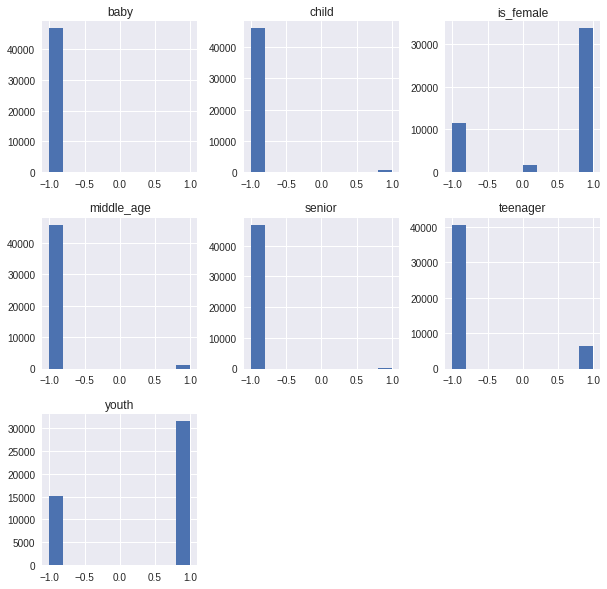

In [8]:
good_selfie_df.hist(figsize=(10,10))  


In [9]:
good_selfie_df.loc[good_selfie_df['baby']== -1, 'baby'] = 0
good_selfie_df.loc[good_selfie_df['teenager']== -1, 'teenager'] = 0
good_selfie_df[good_selfie_df.is_female != 0]
good_selfie_df.loc[good_selfie_df['is_female']== -1, 'is_female'] = 0
good_selfie_df.loc[good_selfie_df['child']== -1, 'child'] = 0
good_selfie_df.loc[good_selfie_df['youth']== -1, 'youth'] = 0
good_selfie_df.loc[good_selfie_df['middle_age']== -1, 'middle_age'] = 0
good_selfie_df.loc[good_selfie_df['senior']== -1, 'senior'] = 0
good_selfie_df.head(10)
good_selfie_df = good_selfie_df[:5000]
popularity_score = popularity_score[:5000]
len(popularity_score)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5000

In [0]:
msk = np.random.rand(len(good_selfie_df)) < 0.85
train_df = good_selfie_df[msk]
train_popularity_score_df = popularity_score[msk]
test_df = good_selfie_df[~msk]
test_popularity_score_df = popularity_score[~msk]

In [11]:
print(len(train_df))
print(len(test_df))
print(len(train_popularity_score_df))
print(len(test_popularity_score_df))

4258
742
4258
742


In [12]:
imgs = []
y = []
for index,row in train_df.iterrows():
    file_name = row['image_name']
    image_path = 'Selfie-dataset/images/'+file_name+'.jpg'
    image = mpimg.imread(image_path)
    x = preprocess_input(image)
    imgs.append(x)
imgs_data = np.array(imgs)
print(imgs_data.shape)

(4258, 306, 306, 3)


In [13]:
y_popularity_score_train = []
for row in train_popularity_score_df:
  y_popularity_score_train.append(row)
y_np_popularity_score_train = np.array(y_popularity_score_train)
print(y_np_popularity_score_train.shape)
min_value = np.amin(y_np_popularity_score_train, axis=0)
max_value = np.amax(y_np_popularity_score_train, axis=0)
print(min_value,max_value)

(4258,)
2.2640000000000002 6.237


In [14]:
min_value = 1.656
max_value = 6.71399
fraction = (max_value-min_value)/3
print(fraction)
class_1 = min_value + fraction
class_2 = class_1 + fraction
class_3 = class_2 + fraction
print(class_1,class_2,class_3)

1.6859966666666668
3.3419966666666667 5.027993333333334 6.713990000000001


In [21]:
y_train= pd.qcut(y_np_popularity_score_train,3, labels=['Great_Selfie','Average_Selfie','Poor_Selfie'])
print(y_train)

[Average_Selfie, Average_Selfie, Average_Selfie, Poor_Selfie, Great_Selfie, ..., Average_Selfie, Average_Selfie, Average_Selfie, Great_Selfie, Great_Selfie]
Length: 4258
Categories (3, object): [Great_Selfie < Average_Selfie < Poor_Selfie]


In [0]:
selfie_state = ['Great_Selfie','Average_Selfie','Poor_Selfie']
y_train = []
for value in y_np_popularity_score_train:
  if value<=class_1:
    state = selfie_state[0]
  elif value>class_1 and value<=class_2:
    state = selfie_state[1]
  else:
    state = selfie_state[2]
  y_train.append(state)
print(y_train[0:100])
  

['Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Great_Selfie', 'Average_Selfie', 'Average_Selfie', 'Poor_Selfie', 'Poor_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Poor_Selfie', 'Great_Selfie', 'Average_Selfie', 'Great_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Average_Selfie', 'Avera

In [22]:
imgs = []
for index, row in test_df.iterrows():
    file_name = row['image_name']
    image_path = 'Selfie-dataset/images/'+file_name+'.jpg'
    image = mpimg.imread(image_path)
    x = preprocess_input(image)
    imgs.append(x)
imgs_test = np.array(imgs)
print(imgs_test.shape)

(742, 306, 306, 3)


In [23]:
y_popularity_score_test = []
for row in test_popularity_score_df:
  y_popularity_score_test.append(row)
y_np_popularity_score_test = np.array(y_popularity_score_test)
y_np_popularity_score_test = np.array(y_np_popularity_score_test)
print(y_np_popularity_score_test.shape)

(742,)


In [24]:
y_test= pd.qcut(y_np_popularity_score_test,3, labels=['Great_Selfie','Average_Selfie','Poor_Selfie'])
print(y_test)

[Great_Selfie, Average_Selfie, Average_Selfie, Poor_Selfie, Great_Selfie, ..., Poor_Selfie, Great_Selfie, Great_Selfie, Average_Selfie, Poor_Selfie]
Length: 742
Categories (3, object): [Great_Selfie < Average_Selfie < Poor_Selfie]


In [0]:
selfie_state = ['Great_Selfie','Average_Selfie','Poor_Selfie']

In [0]:
selfie_state = ['Great_Selfie','Average_Selfie','Poor_Selfie']
y_test = []
for value in y_np_popularity_score_test:
  if value<=class_1:
    state = selfie_state[0]
  elif value>class_1 and value<=class_2:
    state = selfie_state[1]
  else:
    state = selfie_state[2]
  y_test.append(state)
print(len(y_test))
  

795


In [25]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_train = np_utils.to_categorical(encoded_Y)
print(y_train[100])

[0. 0. 1.]


In [26]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_Y)
print(y_test[1])

[1. 0. 0.]


In [27]:
onehotencoder = OneHotEncoder()
print(y_train[0])
y_train_enc = onehotencoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_enc = onehotencoder.fit_transform(y_test.reshape(-1,1)).toarray()

[1. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [28]:
print(y_train[100],y_train_enc[100],y_test[87],y_test_enc[87])

[0. 0. 1.] [0. 1.] [1. 0. 0.] [1. 0.]


In [0]:
def create_model():
  num_output_unit = 3
  model = ResNet50(weights='imagenet',include_top=False)
  #model.summary()
  last_layer = model.output
  # add a global spatial average pooling layer
  x = GlobalAveragePooling2D()(last_layer)
  # add fully-connected & dropout layers
  x = Dense(512, activation='relu',name='fc-1')(x)
  x = Dropout(0.5)(x)
  x = Dense(256, activation='relu',name='fc-2')(x)
  x = Dropout(0.5)(x)
  # a softmax layer for 4 classes
  out_layer = Dense(num_output_unit, activation='softmax',name='output_layer')(x)
  # this is the model we will train
  custom_resnet_model2 = Model(inputs=model.input, outputs=out_layer)
  #custom_resnet_model2.summary()
  for layer in custom_resnet_model2.layers[:-6]:
    layer.trainable = False
  #custom_resnet_model2.layers[-1].trainable
  return custom_resnet_model2


In [0]:
def train():
  custom_resnet_model2 = create_model()
  custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  ckpt_model = 'weights.best_h2.hdf5'
  checkpoint = ModelCheckpoint(ckpt_model,
                    monitor='val_acc',
                    verbose=1,
                    save_best_only=True,
                    mode='max')
  callbacks_list = [checkpoint]
  # fit the model
  t=time.time()
  hist = custom_resnet_model2.fit(imgs_data,y_train,batch_size=32, epochs=12, verbose=1,callbacks=callbacks_list,validation_data=(imgs_test,y_test))
  print("Training time: %s" % (t - time.time()))
  (loss, accuracy) = custom_resnet_model2.evaluate(imgs_test,y_test, batch_size=10, verbose=1)
  print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [31]:
print(y_train.shape)
#train()

(4258, 3)


In [0]:
def test_model_250():
  # create the model
  model = create_model()
  # load model weights
  model.load_weights('weights.best_h2.hdf5')
  # predict values
  predicted_values = model.predict(imgs_test[:250])
  #print(predicted_values)
  for values in predicted_values:
    ind = np.argmax(values)
    arr = [0,0,0]
    arr[ind] = 1
    print(arr)

In [47]:
print(test_model_250())

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]
[1, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 0, 1]


In [33]:
train()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Train on 4258 samples, validate on 742 samples
Epoch 1/12
4258/4258 [==============================] - 83s 20ms/step - loss: 1.2166 - acc: 0.3950 - val_loss: 1.0520 - val_acc: 0.4394

Epoch 00001: val_acc improved from -inf to 0.43935, saving model to weights.best_h2.hdf5
Epoch 2/12
4258/4258 [==============================] - 75s 18ms/step - loss: 1.0352 - acc: 0.4528 - val_loss: 1.1229 - val_acc: 0.4218

Epoch 00002: val_acc did not improve from 0.43935
Epoch 3/12
4258/4258 [==============================] - 76s 18ms/step - loss: 1.0074 - acc: 0.4868 - val_loss: 1.2310 - val_acc: 0.4164

Epoch 00003: val_acc did not improve from 0.43935
Epoch 4/12
4258/4258 [==============================] - 75s 18ms/step - loss: 0.9846 - acc: 0.4915 - val_loss: 1.1685 - val_acc: 0.4367

Epoch 00004: val_acc did not improve from 0.43935
Epoch 5/12
4258/4258 [==============================] - 75s 18ms/step - loss: 0.9865 - acc: 0.4934 - val_loss: 1.1171 - val_acc: 0.4488

Epoch 00005: val_acc improved

In [0]:
print(test_model('/content/gdrive/My Drive/Colab Notebooks/bad sel.jpg'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Great_Selfie


In [0]:
print(imgs_test[1].shape)

(306, 306, 3)
